# $2^k$ Factorial Design

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contrasts-and-Effect-Estimates" data-toc-modified-id="Contrasts-and-Effect-Estimates-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contrasts and Effect Estimates</a></span></li><li><span><a href="#Your-Turn----Activity-I:--Bacterial-Growth" data-toc-modified-id="Your-Turn----Activity-I:--Bacterial-Growth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Your Turn -- Activity I:  Bacterial Growth</a></span></li><li><span><a href="#Estimating-Regression-Coefficients-in-Two-level-Factorial" data-toc-modified-id="Estimating-Regression-Coefficients-in-Two-level-Factorial-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Estimating Regression Coefficients in Two-level Factorial</a></span></li><li><span><a href="#Fitting-regression-model-to-Process-yield-example" data-toc-modified-id="Fitting-regression-model-to-Process-yield-example-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting regression model to Process yield example</a></span></li><li><span><a href="#Visual-Assessment-in-Single-Replicate-Data" data-toc-modified-id="Visual-Assessment-in-Single-Replicate-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visual Assessment in Single Replicate Data</a></span><ul class="toc-item"><li><span><a href="#Normal-probability-plot" data-toc-modified-id="Normal-probability-plot-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Normal probability plot</a></span></li><li><span><a href="#Normal-probability-plot-in-Minitab-style" data-toc-modified-id="Normal-probability-plot-in-Minitab-style-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Normal probability plot in Minitab style</a></span></li></ul></li></ul></div>

In [1]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


## Contrasts and Effect Estimates

**Create the factorial effect matrix**

In [2]:
Xmain=np.array([[+1,-1,-1],
                [+1,+1,-1],
                [+1,-1,+1],
                [+1,+1,+1]])


factorial_eff = pd.DataFrame(Xmain, columns=['Intercept','A','B'])

# Add interaction effects
factorial_eff['AB'] = factorial_eff['A']*factorial_eff['B']

# Observations from three replicates
y = np.array([[28,25,27],
             [36,32,32],
             [18,19,23],
             [31,30,29]])

# Get a vector of total response
total_y = np.c_[y.sum(axis=1)]
factorial_eff, total_y

(   Intercept  A  B  AB
 0          1 -1 -1   1
 1          1  1 -1  -1
 2          1 -1  1  -1
 3          1  1  1   1,
 array([[ 80],
        [100],
        [ 60],
        [ 90]]))

**Compute contrasts, SS, and effect estimates**

In [3]:
k, n = np.log2(len(factorial_eff)), y.shape[1]

contrast_eff = factorial_eff.iloc[:,1:].mul(total_y).sum()
print('Contrast effects\n', contrast_eff.to_string(), sep='')

effects = (contrast_eff)/((2**(k-1))*n)
print('\nEffect estimates\n', effects.to_string(), sep='')

ss_eff = (contrast_eff**2)/((2**k)*n)
print('\nSS effects\n', ss_eff.to_string(), sep='')

Contrast effects
A     50
B    -30
AB    10

Effect estimates
A     8.333333
B    -5.000000
AB    1.666667

SS effects
A     208.333333
B      75.000000
AB      8.333333


**SSE and MSE**

In [4]:
SST = (sum(sum(y**2)) - sum(total_y)**2/y.size)[0]
SSE = SST - sum(ss_eff)
MSE = SSE/(y.size - len(ss_eff) - 1)
print("SSE = {:.2f}, MSE = {:.2f}".format(SSE, MSE))

SSE = 31.33, MSE = 3.92


## Your Turn -- Activity I:  Bacterial Growth 

In [5]:
growth_df = pd.read_excel('data/lect09-2k-factorial.xlsx', sheet_name='Bacteria')
growth_df

,A,B,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6
0,-1,-1,21,22,23,28,20,26
1,1,-1,37,39,38,38,35,36
2,-1,1,25,26,24,25,29,27
3,1,1,31,34,29,33,30,35


## Estimating Regression Coefficients in Two-level Factorial 

In [6]:
from IPython.display import display, Math

from numpy import linalg as LA

X = np.array([[+1,-1,-1,-1],
                [+1,+1,-1,-1],
                [+1,-1,+1,-1],
                [+1,+1,+1,-1],
                [+1,-1,-1,+1],
                [+1,+1,-1,+1],
                [+1,-1,+1,+1],
                [+1,+1,+1,+1]])
display(Math(r'\mathbf{X}'))
print(X)
display(Math(r'\mathbf{X}^T\mathbf{X}'))
print(X.T@X)
display(Math(r'(\mathbf{X}^T\mathbf{X})^{-1}'))
print(LA.inv(X.T@X))

<IPython.core.display.Math object>

[[ 1 -1 -1 -1]
 [ 1  1 -1 -1]
 [ 1 -1  1 -1]
 [ 1  1  1 -1]
 [ 1 -1 -1  1]
 [ 1  1 -1  1]
 [ 1 -1  1  1]
 [ 1  1  1  1]]


<IPython.core.display.Math object>

[[8 0 0 0]
 [0 8 0 0]
 [0 0 8 0]
 [0 0 0 8]]


<IPython.core.display.Math object>

[[0.125 0.    0.    0.   ]
 [0.    0.125 0.    0.   ]
 [0.    0.    0.125 0.   ]
 [0.    0.    0.    0.125]]


**Design matrix generation of 2-level factorial design**

In [7]:
import string
import pandas as pd
from itertools import combinations

# Return 2-level design matrix for k factors.

def gen_factorial_matrix(k, interaction=True, num_rep=1):
  Factors =  list(string.ascii_uppercase[0:k])

  Dmatrix = pd.DataFrame(columns=Factors)

  for i in range(0,k):
    neg,pos = -np.ones(2**i), np.ones(2**i)
  
    Dmatrix[Factors[i]] = np.tile(np.hstack((neg,pos)),2**(k-i-1)).astype(int)
  
  # Add interaction effects
  if interaction:
    for t in range(1,k+1):
      for m in combinations(Factors, t):
        interaction_terms = list(m)
        col_name = ''.join(interaction_terms)
        Dmatrix[col_name] = Dmatrix[interaction_terms].prod(axis=1)

  Dmatrix.insert(0, 'I', np.ones(2**k).astype(int))
  Dmatrix = pd.concat([Dmatrix]*num_rep, ignore_index=True)
  
  return(Dmatrix)

Ex:D Design matrix for $2^3$ factorial

In [8]:
gen_factorial_matrix(k=3, interaction=False, num_rep=1)

,I,A,B,C
0,1,-1,-1,-1
1,1,1,-1,-1
2,1,-1,1,-1
3,1,1,1,-1
4,1,-1,-1,1
5,1,1,-1,1
6,1,-1,1,1
7,1,1,1,1


In [9]:
gen_factorial_matrix(k=3, interaction=True, num_rep=1)

,I,A,B,C,AB,AC,BC,ABC
0,1,-1,-1,-1,1,1,1,-1
1,1,1,-1,-1,-1,-1,1,1
2,1,-1,1,-1,-1,1,-1,1
3,1,1,1,-1,1,-1,-1,-1
4,1,-1,-1,1,1,-1,-1,1
5,1,1,-1,1,-1,1,-1,-1
6,1,-1,1,1,-1,-1,1,-1
7,1,1,1,1,1,1,1,1


## Fitting regression model to Process yield example

In [10]:

import numpy as np
import numpy.linalg as LA

X=np.array([[+1,-1,-1,+1],
            [+1,+1,-1,-1],
            [+1,-1,+1,-1],
            [+1,+1,+1,+1],
            [+1,-1,-1,+1],
            [+1,+1,-1,-1],
            [+1,-1,+1,-1],
            [+1,+1,+1,+1]])
print(X)
print((X.T).dot(X))
print(LA.inv((X.T).dot(X)))
#Note that X’X is diagonal (observing the product pattern) 

[[ 1 -1 -1  1]
 [ 1  1 -1 -1]
 [ 1 -1  1 -1]
 [ 1  1  1  1]
 [ 1 -1 -1  1]
 [ 1  1 -1 -1]
 [ 1 -1  1 -1]
 [ 1  1  1  1]]
[[8 0 0 0]
 [0 8 0 0]
 [0 0 8 0]
 [0 0 0 8]]
[[0.125 0.    0.    0.   ]
 [0.    0.125 0.    0.   ]
 [0.    0.    0.125 0.   ]
 [0.    0.    0.    0.125]]


In [11]:
import pandas as pd

y = np.c_[[32,46,57,65,36,48,57,50]]


Xmain=np.array([[+1,-1,-1,-1],
                [+1,+1,-1,-1],
                [+1,-1,+1,-1],
                [+1,+1,+1,-1],
                [+1,-1,-1,+1],
                [+1,+1,-1,+1],
                [+1,-1,+1,+1],
                [+1,+1,+1,+1]])
Xdf = pd.DataFrame(Xmain, columns=['Intercept','A','B','C'])
Xdf

,Intercept,A,B,C
0,1,-1,-1,-1
1,1,1,-1,-1
2,1,-1,1,-1
3,1,1,1,-1
4,1,-1,-1,1
5,1,1,-1,1
6,1,-1,1,1
7,1,1,1,1


In [12]:
import statsmodels.api as sm

yield_model = sm.OLS(y, Xdf).fit()
yield_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.609  
Dependent Variable: y                AIC:                56.0647
Date:               2021-12-09 10:49 BIC:                56.3825
No. Observations:   8                Log-Likelihood:     -24.032
Df Model:           3                F-statistic:        4.636  
Df Residuals:       4                Prob (F-statistic): 0.0863 
R-squared:          0.777            Scale:              47.625 
-----------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    48.8750    2.4399  20.0315  0.0000  42.1007  55.6493
A             3.3750    2.4399   1.3833  0.2388  -3.3993  10.1493
B             8.3750    2.4399   3.4325  0.0265   1.6007  15.1493
C            -1.1250    2.4399  -0.4611  0.6687  -7.8993   5.6493
----------------------------------------------------------------
Omnibus:              2.319        Durbin-Watson:          1.487
Prob(Omnibus):        0.314        Jarque-Bera (JB):       1.200
Skew:                 -0.900       Prob(JB):               0.549
Kurtosis:             2.400        Condition No.:          1    
================================================================

"""

In [13]:
import statsmodels.api as sm

yield_reduced_model = sm.OLS(y,Xdf.drop(columns=['A','C'])).fit()
yield_reduced_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.601  
Dependent Variable: y                AIC:                55.4747
Date:               2021-12-09 10:49 BIC:                55.6335
No. Observations:   8                Log-Likelihood:     -25.737
Df Model:           1                F-statistic:        11.54  
Df Residuals:       6                Prob (F-statistic): 0.0145 
R-squared:          0.658            Scale:              48.625 
-----------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    48.8750    2.4654  19.8245  0.0000  42.8424  54.9076
B             8.3750    2.4654   3.3970  0.0145   2.3424  14.4076
----------------------------------------------------------------
Omnibus:              1.922        Durbin-Watson:          2.386
Prob(Omnibus):        0.383        Jarque-Bera (JB):       0.739
Skew:                 -0.019       Prob(JB):               0.691
Kurtosis:             1.511        Condition No.:          1    
================================================================

"""

Note that the significance of coefficients are not synonymous with those from the ANOVA table  
because of high multicollinearity (condition number > 100 in model output).

## Visual Assessment in Single Replicate Data

### Normal probability plot

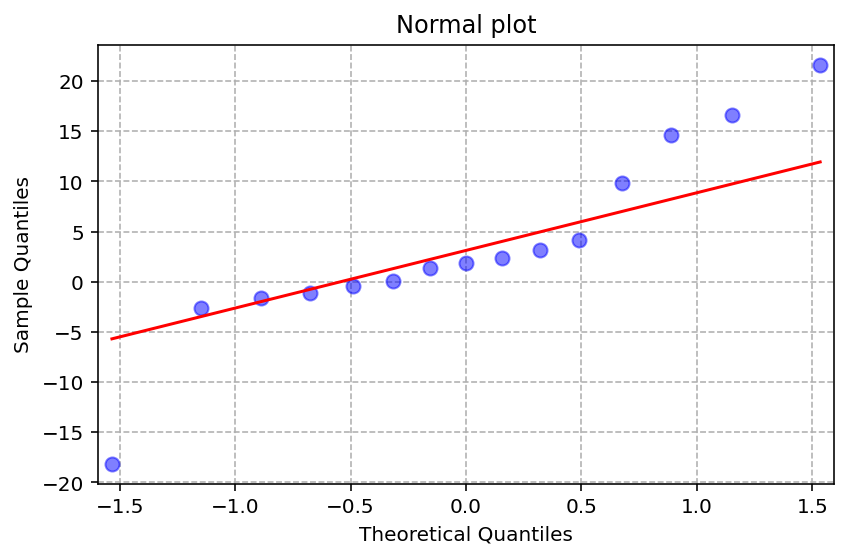

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

effects = np.array([21.625,3.125,9.875,14.625,0.125,-18.125,16.625,
                    2.375,-0.375,-1.125,1.875,4.125,-1.625,-2.625,1.375])
sm.graphics.qqplot(effects,line='q', alpha=0.5, ms=7)
plt.title('Normal plot')
plt.tight_layout()
plt.grid(ls='--')
pass;

### Normal probability plot in Minitab style

In [15]:
# Input: effects = a dictionary of all effects 
#        type = normal or halfnormal
#        sig_eff = a list of significant effects

def effect_plot(effects, type='normal', sig_eff=None):
  
  n = len(effects)
  val = list(effects.values())
  Y = np.abs(val) if type=='halfnormal' else val
  Y = np.array(Y)

  # Determine sample quantiles from normal distribution and plot them against the effects.
  sample_cdf = (np.array(range(1, n+1)) - 0.5)/n  
  if type == 'halfnormal':
    sample_q = stats.halfnorm.ppf(sample_cdf) 
  else:
    sample_q = stats.norm.ppf(sample_cdf)

  _,ax = plt.subplots(figsize=(5,5))
  plt.scatter(sorted(Y), sample_q, color='blue', marker='s', s=50, alpha=0.5)

  # Set the % normal probability labels for the y-axis.
  if type=='halfnormal':
    #probs = np.array([1,10, 20, 30, 40, 50, 60,70,80,90,95,97,99])/100
    probs = np.array([1,10,20,30,40,50,60,70,80,90,95,97,99])/100
    theoretical_q = stats.halfnorm.ppf(probs)
  else:
    probs = np.array([1,5,10,20,30,40,50,60,70,80,90,95,99])/100
    theoretical_q = stats.norm.ppf(probs)
  

  plt.yticks(theoretical_q, [str(x) for x in (probs*100).astype(int)])
  plt.ylim([-0.1,2.7]) if type == 'halfnormal' else plt.ylim([-3,3])
  plt.xlim(right=1.1*max(Y))
  
  if type == 'normal':
    # Generate a line passing through quantile 0.25 and 0.75 as the reference.
    x1, x2 = np.quantile(Y, 0.25, interpolation='lower'), np.quantile(Y, 0.75, interpolation='lower')
    y1, y2 = stats.norm.ppf(0.25), stats.norm.ppf(0.75)
    
    m = (y2-y1)/(x2-x1) 
    c = y1-m*x1
    x = [sorted(Y)[0], sorted(Y)[-1]]
    y = [m*sorted(Y)[0]+c, m*sorted(Y)[-1]+c]
    
    ax.set_xlabel('Effect estimates', fontsize=14)
    ax.set_ylabel('Normal % probability', fontsize=14) 
  else:
    # Generate a line passing through the origin (0,0) and the median as the reference.
    x_median = np.quantile(Y, 0.5, interpolation='lower')
    y_median = stats.halfnorm.ppf(0.5)
    m = y_median/x_median
    x = [0, sorted(Y)[-1]]
    y = [0, m*sorted(Y)[-1]]
    
    ax.set_xlabel('|Effect estimates|')
    ax.set_ylabel('Half-normal % probability') 

  ax.tick_params(axis='y', which='major', labelsize=10) # axis='both'
  ax.tick_params(axis='y', which='minor', labelsize=8)

  
  ax.plot(x,y, color='red', alpha=0.5)
  plt.grid(ls='--')
      
  # Annotate the significant effects
  if(sig_eff):
     
    xshift = (max(Y)-min(Y))*0.02

    for i, label in enumerate(sig_eff):
      x = effects.get(label)
      if type == 'halfnormal': x = abs(x)
     
      idx = np.where(np.array(sorted(Y)) == x)[0].item()+1
      if type == 'halfnormal':
        text = ax.annotate(label, (x+xshift, stats.halfnorm.ppf((idx-0.5)/n)-0.1) )                                 
      else:
        text = ax.annotate(label, (x+xshift, stats.norm.ppf((idx-0.5)/n)-0.25) )                                 
      text.set_fontsize(12)
      
  pass;

In [16]:
effects = {'A':21.625,'B':3.125, 'C':9.875,'D':14.625,'AB':0.125, 'AC':-18.125,'AD':16.625,
          'BC':2.375, 'BD':-0.375, 'CD':-1.125, 'ABC':1.875, 'ABD':4.125,
          'ACD':-1.625,'BCD':-2.625,'ABCD':1.375}
sig_eff = ['A','C','D','AC', 'AD']

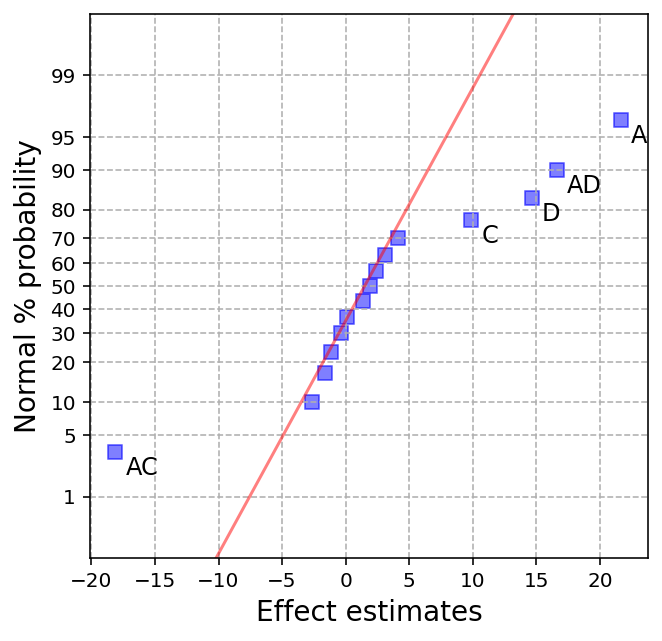

In [17]:
effect_plot(effects, type='normal', sig_eff=sig_eff)

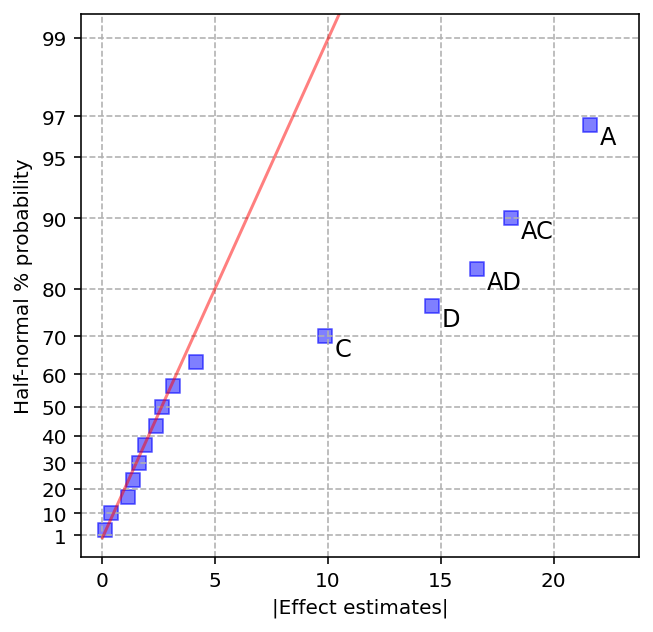

In [18]:
effect_plot(effects, type='halfnormal', sig_eff=sig_eff)

**Design Projection**

From the visual assessment, non-significant effects can be removed from the factorial effect matrix and the remaining columns  
are used to fit the model.